In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

# Example: Generate a Dataset
Error term in linear equation is normal, and the standard deviation is 0.01. Each row in "features" consists of 2D data examples, and each row in "labels" is a 1D label value (scalar).

In [4]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [5]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.0520, 0.4685]) 
label: tensor([2.7230])


In [9]:
# generate scatterplot to view negative correlation between features and labels.

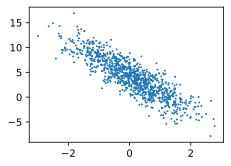

In [10]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1);

In [11]:
# shuffle dataset and access minibatches

In [12]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [13]:
# print first small batch

In [42]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.2605,  1.3133],
        [-0.1226,  1.8295],
        [-0.9496,  0.1382],
        [ 0.8322,  0.1899],
        [ 0.5484,  1.0950],
        [ 1.2592,  0.8383],
        [ 0.6017,  0.5573],
        [ 0.5348, -0.5820],
        [ 0.4468, -0.1641],
        [-1.2385,  0.6181]]) 
 tensor([[ 0.2460],
        [-2.2597],
        [ 1.8396],
        [ 5.2275],
        [ 1.5817],
        [ 3.8721],
        [ 3.5057],
        [ 7.2498],
        [ 5.6545],
        [-0.3720]])


In [ ]:
# initialize weights by sampling random numbers from a normal distribution with mean 0 and a standard deviation of 0.01, and setting the bias to 0.

In [43]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Define Stochastic Gradient Descent Model
Update the parameters until they fit the data (i.e., take the gradient of the loss function w.r.t. parameters. Doing so iteratively will reduce the loss.

In [44]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [45]:
# loss function
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [46]:
# the size of the step is determined by the learning rate (lr)
# since loss is calculated as a sum over the minibatch of examples, normalize step size by the batch size
# the function below (sgd) is an optimization algorithm
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

# Training
Implement a training loop, which consists of taking a minibatch of training examples and passing them through the model to obtain a set of predictions. "Epochs" and "lr" are hyperparameters, which must be set arbitrarily and then retroactively adjusted/tuned. "Epoch" iterates through the entire dataset once through every example.

After calculating the loss, the backwards pass is initiated through the network, storing the gradients with respect to each parameter. Then the "sgd" optmization algorithm is called to update the parameters automatically.

In [47]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [50]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000050
epoch 2, loss 0.000050
epoch 3, loss 0.000050


In [51]:
# check error against true parameters (of which we know the value because we created the data)
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([7.8797e-05, 4.7517e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0003], grad_fn=<RsubBackward1>)
